In [45]:
from kitti_labels import *
import matplotlib.pyplot as plt
from scipy.misc import imread
import warnings
warnings.filterwarnings('ignore')

In [49]:
face_idx = np.array([
        [1, 2, 6, 5],
        [2, 3, 7, 6],
        [3, 4, 8, 7],
        [4, 1, 5, 8]])
face_idx-=1
colors = ['g','y','r','w']
trun_style = ['-','--']
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111)

In [66]:
idx = 95 #Image index
calib = CalibFile('calib/{:06d}.txt'.format(idx)) # Load Calibration file, Returns an object with 4 Projection matricess P0,..,P3 and R0_rect
labels = LabelFile('labels/{:06d}.txt'.format(idx)) #Load Labels
im = imread('image_2/{:06d}.png'.format(idx)) #Load Img


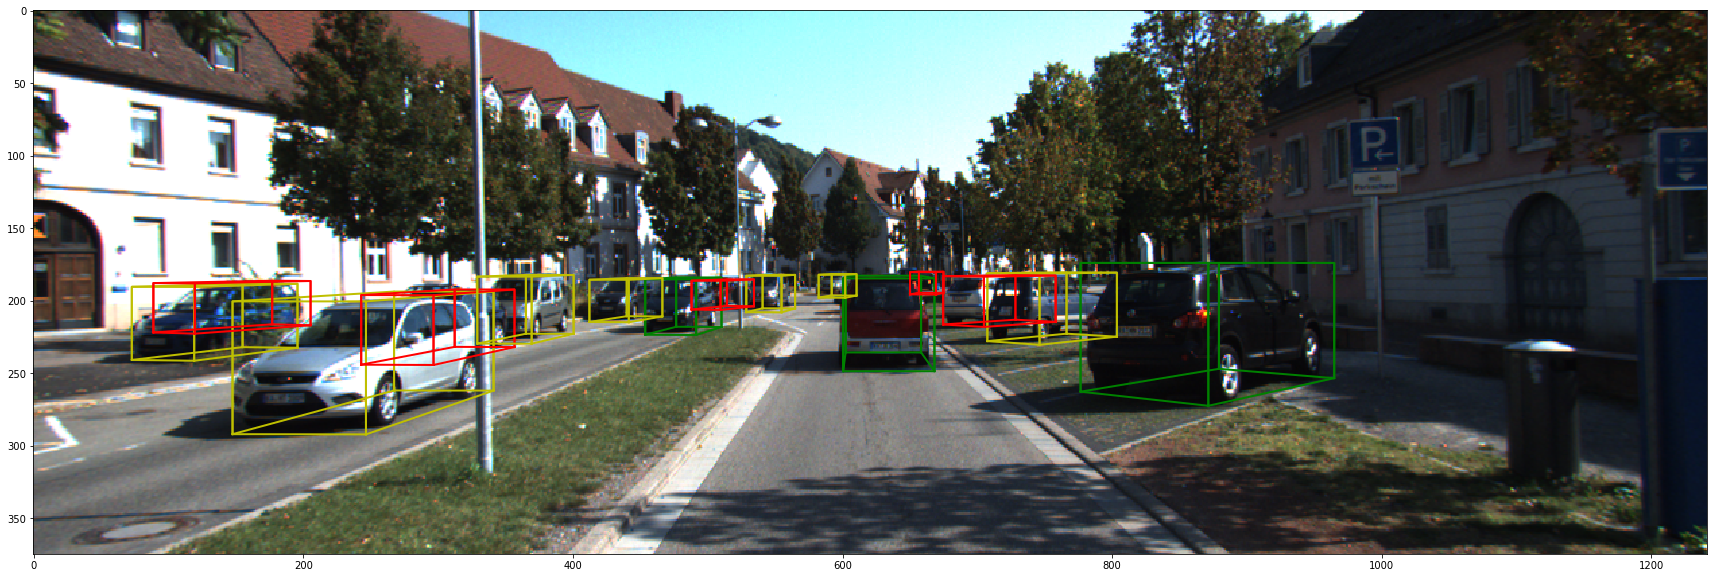

In [82]:
ax.imshow(im, interpolation='nearest', aspect='auto')
#ax.set_aspect(1)
for label in labels.labels:
    corners = computeBox3D(label, calib.P2)
    orientation = computeOrientation3D(label, calib.P2)
    for f in range(4):
        try:
            corner = [corners[0,i] for i in face_idx[f,:]]
            X1 = np.hstack((corner,corners[0,face_idx[f,0]]))+1
            corner = [corners[1,i] for i in face_idx[f,:]]
            Y1 = np.hstack((corner ,corners[1,face_idx[f,0]]))+1
            ax.plot(X1, Y1, color = colors[int(label['occlusion'])], linestyle=trun_style[int(label['truncation'])], linewidth = 2)
        except Exception as e:
            print(e)
ax.figure.savefig('test.png')            